# Automating Crypto Website API Pull

In [3]:
# API = Application program Interface = intermediate (middle man) for the communication of 2 applications

In [1]:
# Anaconda Prompt : execute this => jupyter Notebook --ServerApp.iopub_data_rate_limit=1e10

In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2ce219d9-83e7-4aff-8833-c2519e51c4c8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [5]:
type(data)

dict

In [25]:
import pandas as pd
#pd.reset_option('display.max.columns', None)
#pd.reset_option('display.max.rows', None)

In [27]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id                                               name  \
0         1                                            Bitcoin   
1      1027                                           Ethereum   
2       825                                        Tether USDt   
3        52                                                XRP   
4      5426                                             Solana   
5      1839                                                BNB   
6        74                                           Dogecoin   
7      3408                                               USDC   
8      2010                                            Cardano   
9      1958                                               TRON   
10     5805                                          Avalanche   
11     5994                                          Shiba Inu   
12    11419                                            Toncoin   
13     1975                                          Chainlink   
14     6636                                           Polkadot   
15      512                                            Stellar   
16     1831                                       Bitcoin Cash   
17    20947                                                Sui   
18     4642                                             Hedera   
19    24478                                               Pepe   
20     7083                                            Uniswap   
21        2                                           Litecoin   
22     6535                                      NEAR Protocol   
23     3957                                       UNUS SED LEO   
24    21794                                              Aptos   
25     8916                                  Internet Computer   
26    29470                                        Ethena USDe   
27     4943                                                Dai   
28    28321                                     POL (ex-MATIC)   
29     1321                                   Ethereum Classic   
30     3077                                            VeChain   
31     3635                                             Cronos   
32     5690                                             Render   
33    22974                                          Bittensor   
34     3773              Artificial Superintelligence Alliance   
35    20396                                              Kaspa   
36    11841                                           Arbitrum   
37     2280                                           Filecoin   
38     7278                                               Aave   
39    27075                                             Mantle   
40     4030                                           Algorand   
41     4847                                             Stacks   
42     3794                                             Cosmos   
43     6536                                             MANTRA   
44      328                                             Monero   
45    11092                                       Bitget Token   
46    28752                                          dogwifhat   
47     3513                                             Fantom   
48     3897                                                OKB   
49    22861                                           Celestia   
50    23095                                               Bonk   
51    10603                                          Immutable   
52    11840                                           Optimism   
53     7226                                          Injective   
54    30171                                             Ethena   
55     2416                                      Theta Network   
56     6719                                          The Graph   
57    10804                                              FLOKI   
58    13502                                          Worldcoin   
59    23149                                      

In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2ce219d9-83e7-4aff-8833-c2519e51c4c8',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df

    if not os.path.isfile(r'D:\Data Analyst Bootcamp\Python\Pandas\API.csv'):#Create
        df.to_csv(r'D:\Data Analyst Bootcamp\Python\Pandas\API.csv', header = 'column_names')
    else: #Append
        df.to_csv(r'D:\Data Analyst Bootcamp\Python\Pandas\API.csv', mode = 'a', header=False)

In [107]:
import os
from time import time
from time import sleep

for u in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # Sleep for 1 min
exit()

API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [23]:
pd.reset_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
#df

In [101]:
df7 = pd.read_csv(r'D:\Data Analyst Bootcamp\Python\Pandas\API.csv')
df7

Unnamed: 0     id         name  symbol         slug  num_market_pairs  \
0              0      1      Bitcoin     BTC      bitcoin             11813   
1              1   1027     Ethereum     ETH     ethereum              9615   
2              2    825  Tether USDt    USDT       tether            106023   
3              3     52          XRP     XRP          xrp              1449   
4              4   5426       Solana     SOL       solana               798   
...          ...    ...          ...     ...          ...               ...   
9995        4995  15135    TFS Token     TFS    tfs-token                 8   
9996        4996  33806     Baby Wen    BWEN     baby-wen                 4   
9997        4997  30703   Based Yoda    BODA   based-yoda                 3   
9998        4998  31319         QLix    QLIX         qlix                 1   
9999        4999  32170      Towelie  TOWELI  towelie-wtf                 5   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
9995  2021-11-24T15:01:29.000Z   
9996  2024-11-05T10:22:13.000Z   
9997  2024-04-16T09:45:35.000Z   
9998  2024-05-20T10:15:12.000Z   
9999  2024-07-10T07:03:17.000Z   

                                                   tags         max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'ava...                NaN   
3     ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
4     ['pos', 'platform', 'solana-ecosystem', 'cms-h...                NaN   
...                                                 ...                ...   
9995                                                 []   2500000000.00000   
9996                                          ['memes']     99981984.00000   
9997                                          ['memes'] 100000000000.00000   
9998             ['ethereum-ecosystem', 'telegram-bot']      1000000.00000   
9999                    ['memes', 'ethereum-ecosystem']   1000000000.00000   

      circulating_supply  ...  quote.USD.market_cap_dominance  \
0         19790025.00000  ...                        55.92560   
1        120441030.04711  ...                        12.99340   
2     134038109772.85744  ...                         3.89820   
3      57051491087.00000  ...                         3.28850   
4        475158659.63339  ...                         3.26730   
...                  ...  ...                             ...   
9995             0.00000  ...                         0.00000   
9996             0.00000  ...                         0.00000   
9997             0.00000  ...                         0.00000   
9998             0.00000  ...                         0.00000   
9999             0.00000  ...                         0.00000   

      quote.USD.fully_diluted_market_cap  quote.USD.tvl  \
0                    2042794565983.87012            NaN   
1                     447337590054.65997            NaN   
2                     137295316689.38000            NaN   
3                     198414050050.23001            NaN   
4                     139482392906.13000            NaN   
...                                  ...            ...   
9995                      12199597.46000            NaN   
9996                      14891777.51000            NaN   
9997                        572247.02000            NaN   
9998                        188466.37000            NaN   
9999                        497915.42000            NaN   

        quote.USD.last_updated  platform.id  platform.name  platform.symbol  \
0     2024-12-01T19:12:00.000Z          NaN            NaN              NaN   
1     2024-12-01T19:13:00.000Z          NaN            NaN     

In [103]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df7

Unnamed: 0     id         name  symbol         slug  num_market_pairs  \
0              0      1      Bitcoin     BTC      bitcoin             11813   
1              1   1027     Ethereum     ETH     ethereum              9615   
2              2    825  Tether USDt    USDT       tether            106023   
3              3     52          XRP     XRP          xrp              1449   
4              4   5426       Solana     SOL       solana               798   
...          ...    ...          ...     ...          ...               ...   
9995        4995  15135    TFS Token     TFS    tfs-token                 8   
9996        4996  33806     Baby Wen    BWEN     baby-wen                 4   
9997        4997  30703   Based Yoda    BODA   based-yoda                 3   
9998        4998  31319         QLix    QLIX         qlix                 1   
9999        4999  32170      Towelie  TOWELI  towelie-wtf                 5   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
9995  2021-11-24T15:01:29.000Z   
9996  2024-11-05T10:22:13.000Z   
9997  2024-04-16T09:45:35.000Z   
9998  2024-05-20T10:15:12.000Z   
9999  2024-07-10T07:03:17.000Z   

                                                   tags         max_supply  \
0     ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1     ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2     ['stablecoin', 'asset-backed-stablecoin', 'ava...                NaN   
3     ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
4     ['pos', 'platform', 'solana-ecosystem', 'cms-h...                NaN   
...                                                 ...                ...   
9995                                                 []   2500000000.00000   
9996                                          ['memes']     99981984.00000   
9997                                          ['memes'] 100000000000.00000   
9998             ['ethereum-ecosystem', 'telegram-bot']      1000000.00000   
9999                    ['memes', 'ethereum-ecosystem']   1000000000.00000   

      circulating_supply  ...  quote.USD.market_cap_dominance  \
0         19790025.00000  ...                        55.92560   
1        120441030.04711  ...                        12.99340   
2     134038109772.85744  ...                         3.89820   
3      57051491087.00000  ...                         3.28850   
4        475158659.63339  ...                         3.26730   
...                  ...  ...                             ...   
9995             0.00000  ...                         0.00000   
9996             0.00000  ...                         0.00000   
9997             0.00000  ...                         0.00000   
9998             0.00000  ...                         0.00000   
9999             0.00000  ...                         0.00000   

      quote.USD.fully_diluted_market_cap  quote.USD.tvl  \
0                    2042794565983.87012            NaN   
1                     447337590054.65997            NaN   
2                     137295316689.38000            NaN   
3                     198414050050.23001            NaN   
4                     139482392906.13000            NaN   
...                                  ...            ...   
9995                      12199597.46000            NaN   
9996                      14891777.51000            NaN   
9997                        572247.02000            NaN   
9998                        188466.37000            NaN   
9999                        497915.42000            NaN   

        quote.USD.last_updated  platform.id  platform.name  platform.symbol  \
0     2024-12-01T19:12:00.000Z          NaN            NaN              NaN   
1     2024-12-01T19:13:00.000Z          NaN            NaN     

In [19]:
df7.columns

Index(['Unnamed: 0', 'id', 'name', 'symbol', 'slug', 'num_market_pairs',
       'date_added', 'tags', 'max_supply', 'circulating_supply',
       'total_supply', 'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [99]:
pd.set_option('display.max.rows', 10)
#pd.set_option('display.max.columns', None)
df7 = df7.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df7

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                         -0.21496                       0.31433   
Ethereum                        -0.22979                       1.23664   
Tether USDt                     -0.00233                       0.01494   
XRP                              2.69197                       4.00721   
Solana                          -0.33001                      -1.02557   
...                                  ...                           ...   
TFS Token                       -0.08683                       0.40943   
Baby Wen                         0.11373                      -6.16805   
Based Yoda                      -0.01433                      10.95040   
QLix                             5.57152                      -8.80401   
Towelie                          0.00431                      -0.89731   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                          1.08764                      41.17934   
Ethereum                        12.10251                      48.65327   
Tether USDt                      0.00644                       0.12490   
XRP                             43.32383                     285.85523   
Solana                          -4.79898                      42.68502   
...                                  ...                           ...   
TFS Token                        0.67190                       0.37718   
Baby Wen                       -20.48709                     -22.96260   
Based Yoda                       7.38066                      -0.78660   
QLix                           431.41481                     534.57311   
Towelie                        -20.43915                     -23.18531   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          60.14173                      66.18044  
Ethereum                         55.00848                      47.16792  
Tether USDt                       0.05110                       0.05394  
XRP                             248.96870                     252.79077  
Solana                           68.24676                      77.50258  
...                                   ...                           ...  
TFS Token                         1.59681                       5.30494  
Baby Wen                        -22.96260                     -22.96260  
Based Yoda                      -23.53407                     188.60993  
QLix                            298.79252                     217.87047  
Towelie                         -18.97253                      42.67869  

[4958 rows x 6 columns]

In [39]:
df8 = df7.stack()
df8

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.21496
         quote.USD.percent_change_24h     0.31433
         quote.USD.percent_change_7d      1.08764
         quote.USD.percent_change_30d    41.17934
         quote.USD.percent_change_60d    60.14173
                                           ...   
Towelie  quote.USD.percent_change_24h    -0.89731
         quote.USD.percent_change_7d    -20.43915
         quote.USD.percent_change_30d   -23.18531
         quote.USD.percent_change_60d   -18.97253
         quote.USD.percent_change_90d    42.67869
Length: 29748, dtype: float64

In [41]:
type(df8)

pandas.core.series.Series

In [43]:
#pd.set_option('display.max.columns', None)
df9 = df8.to_frame(name='values')
#df9

In [45]:
type(df9)

pandas.core.frame.DataFrame

In [47]:
df8.count()

29748

In [83]:
index = pd.Index(range(29748))
df10 = df9.reset_index()
df10

name                       level_1    values
0      Bitcoin   quote.USD.percent_change_1h  -0.21496
1      Bitcoin  quote.USD.percent_change_24h   0.31433
2      Bitcoin   quote.USD.percent_change_7d   1.08764
3      Bitcoin  quote.USD.percent_change_30d  41.17934
4      Bitcoin  quote.USD.percent_change_60d  60.14173
...        ...                           ...       ...
29743  Towelie  quote.USD.percent_change_24h  -0.89731
29744  Towelie   quote.USD.percent_change_7d -20.43915
29745  Towelie  quote.USD.percent_change_30d -23.18531
29746  Towelie  quote.USD.percent_change_60d -18.97253
29747  Towelie  quote.USD.percent_change_90d  42.67869

[29748 rows x 3 columns]

In [85]:
df10 = df10.rename(columns ={'level_1' : 'percent_change'})
df10

name                percent_change    values
0      Bitcoin   quote.USD.percent_change_1h  -0.21496
1      Bitcoin  quote.USD.percent_change_24h   0.31433
2      Bitcoin   quote.USD.percent_change_7d   1.08764
3      Bitcoin  quote.USD.percent_change_30d  41.17934
4      Bitcoin  quote.USD.percent_change_60d  60.14173
...        ...                           ...       ...
29743  Towelie  quote.USD.percent_change_24h  -0.89731
29744  Towelie   quote.USD.percent_change_7d -20.43915
29745  Towelie  quote.USD.percent_change_30d -23.18531
29746  Towelie  quote.USD.percent_change_60d -18.97253
29747  Towelie  quote.USD.percent_change_90d  42.67869

[29748 rows x 3 columns]

In [87]:
df10['percent_change'] = df10['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df10 = df10.reset_index()
df10

index     name percent_change    values
0          0  Bitcoin             1h  -0.21496
1          1  Bitcoin            24h   0.31433
2          2  Bitcoin             7d   1.08764
3          3  Bitcoin            30d  41.17934
4          4  Bitcoin            60d  60.14173
...      ...      ...            ...       ...
29743  29743  Towelie            24h  -0.89731
29744  29744  Towelie             7d -20.43915
29745  29745  Towelie            30d -23.18531
29746  29746  Towelie            60d -18.97253
29747  29747  Towelie            90d  42.67869

[29748 rows x 4 columns]

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df10 = df10.iloc[:50, :]
df10

index     name percent_change   values
0       0  Bitcoin             1h -0.21496
1       1  Bitcoin            24h  0.31433
2       2  Bitcoin             7d  1.08764
3       3  Bitcoin            30d 41.17934
4       4  Bitcoin            60d 60.14173
..    ...      ...            ...      ...
45     45     USDC            30d  0.01596
46     46     USDC            60d -0.01574
47     47     USDC            90d -0.00803
48     48  Cardano             1h -0.21859
49     49  Cardano            24h -1.32818

[50 rows x 4 columns]

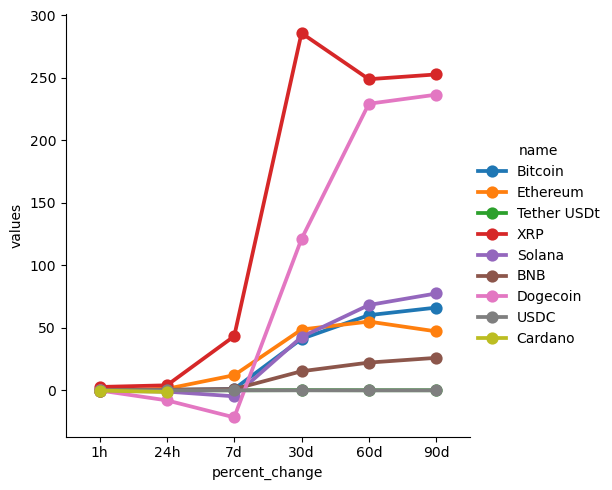

In [95]:
sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df10, kind = 'point')

In [105]:
df11 = df7[['name', 'quote.USD.price', 'timestamp']]
df11

name  quote.USD.price                   timestamp
0         Bitcoin      97275.93171  2024-12-01 20:16:09.247477
1        Ethereum       3714.16277  2024-12-01 20:16:09.247477
2     Tether USDt          1.00074  2024-12-01 20:16:09.247477
3             XRP          1.98414  2024-12-01 20:16:09.247477
4          Solana        236.69735  2024-12-01 20:16:09.247477
...           ...              ...                         ...
9995    TFS Token          0.00488  2024-12-01 20:16:28.499022
9996     Baby Wen          0.14894  2024-12-01 20:16:28.499022
9997   Based Yoda          0.00001  2024-12-01 20:16:28.499022
9998         QLix          0.18847  2024-12-01 20:16:28.499022
9999      Towelie          0.00050  2024-12-01 20:16:28.499022

[10000 rows x 3 columns]

In [117]:
# If we want to look just at the BITCOIN : 
df11 = df11.query("name == 'Bitcoin'")
df11

name  quote.USD.price                   timestamp
0     Bitcoin      97275.93171  2024-12-01 20:16:09.247477
5000  Bitcoin      97282.26172  2024-12-01 20:16:28.499022

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

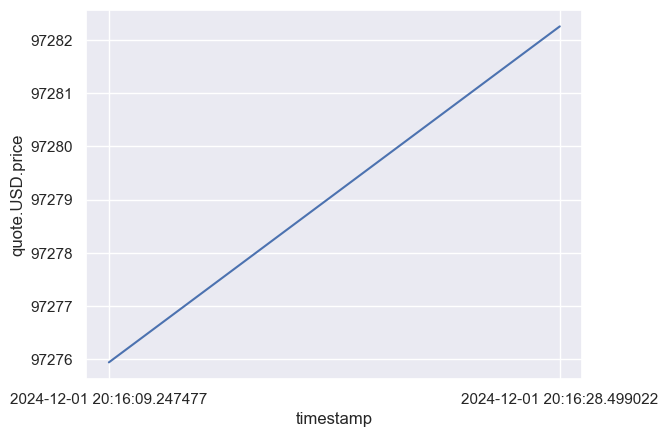

In [119]:
sns.set_theme(style = "darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)